<a href="https://colab.research.google.com/github/gladysbabs/Time--Series/blob/main/Resampling_Datetime_Data(Core)_Gladys_Babirye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Part1: Load the data

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/CodingDojo/02-IntroML/Week08/Data/london_weather_MODIFIED - london_weather_MODIFIED.csv')
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


- 'date' column is an int datatype, we shall convert it to the datetime using pandas.

## Convert the date column to datetime

In [ ]:
pd.to_datetime(df['date'])

0       1970-01-01 00:00:00.019790101
1       1970-01-01 00:00:00.019790102
2       1970-01-01 00:00:00.019790103
3       1970-01-01 00:00:00.019790104
4       1970-01-01 00:00:00.019790105
                     ...             
15336   1970-01-01 00:00:00.020201227
15337   1970-01-01 00:00:00.020201228
15338   1970-01-01 00:00:00.020201229
15339   1970-01-01 00:00:00.020201230
15340   1970-01-01 00:00:00.020201231
Name: date, Length: 15341, dtype: datetime64[ns]

- Date is not as expected, pandas interpreted it as Unix times, so need to correct it using the appropriate format.

In [ ]:
#Original 'date' column shows a full year,double-digit month & double-digit day: format %Y%m%d
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

- In the date display, no more [ns] displayed.

## Setting 'date' as index

In [ ]:
df = df.set_index('date')
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


## Filtering required data
- Keep only data from the year 2000 or later.
- Keep only the following features:precipitation, mean_temp, min_temp, max_temp,snow_depth


In [ ]:
df=df.loc['2000':,['precipitation', 'mean_temp', 'min_temp', 'max_temp','snow_depth']]
df.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0


## Imputation

In [ ]:
null_cols=df.isna()

null_cols.sum()/len(df)*100

precipitation     5.084083
mean_temp         5.462130
min_temp          5.031938
max_temp          5.084083
snow_depth       22.839265
dtype: float64

- I will fill missing values in the 'preciptation' and 'snow_depth' columns with 0

In [ ]:
# filling preciptation & snow_depth with 0
df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(0)

### Imputation: 'mean_temp', 'min_temp' & 'max_temp'.
- Inorder to find out which imputation strategies to consider, we shall need to explore the data further as seen below.

In [ ]:
new_df = df[['mean_temp', 'min_temp', 'max_temp']].copy()
new_df

,mean_temp,min_temp,max_temp
date,,,
2000-01-01,7.0,4.9,10.8
2000-01-02,7.9,5.0,11.5
2000-01-03,9.4,7.2,9.5
2000-01-04,7.0,4.4,11.0
2000-01-05,6.4,1.9,10.8
...,...,...,...
2020-12-27,7.5,7.6,7.5
2020-12-28,1.1,-1.3,3.6
2020-12-29,2.6,1.1,4.1


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mean_temp  7252 non-null   float64
 1   min_temp   7285 non-null   float64
 2   max_temp   7281 non-null   float64
dtypes: float64(3)
memory usage: 239.7 KB


In [ ]:
day_of_week = new_df.index.day_name()
day_of_week.value_counts()

date
Saturday     1096
Sunday       1096
Monday       1096
Tuesday      1096
Wednesday    1096
Thursday     1096
Friday       1095
Name: count, dtype: int64

In [ ]:
# The missing values seem to occur on Friday.
# We shall then try to remove the weekends(Sundays and Saturdays) inorder to simulate all the values.
new_df = new_df[ ~day_of_week.isin(['Sunday','Saturday']) ]
new_df.index.day_name().value_counts()

date
Monday       1096
Tuesday      1096
Wednesday    1096
Thursday     1096
Friday       1095
Name: count, dtype: int64

In [ ]:
#Creating a daily frequency:
new_dfDaily = new_df.asfreq("D")
new_dfDaily.head()

,mean_temp,min_temp,max_temp
date,,,
2000-01-03,9.4,7.2,9.5
2000-01-04,7.0,4.4,11.0
2000-01-05,6.4,1.9,10.8
2000-01-06,8.9,7.0,11.0
2000-01-07,7.2,3.4,9.2


In [ ]:
#checking for null values:
null_columns=new_dfDaily.isna()
null_columns.sum()/len(new_dfDaily)*100

mean_temp    32.520537
min_temp     32.181510
max_temp     32.233668
dtype: float64

- The null values seem quite significant and roughly at the same percentage. bfill and ffill won't be able to sort this out since the missing values are quite significant (32% of missing values) and also it's easier to simulate them since they occured on Friday. We shall therefore impute these missing values using interpolation.

### Interpolation

In [ ]:
## interpolating temperature measures
df['mean_temp'] = df['mean_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()

In [ ]:
#checking if null values still exist:
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

#Part2: Visualizations

In [ ]:
#checking original dataframe frequency:
df_new = df.copy()
df_new.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=7671, freq=None)

- From the above observation, the frequency seems to be daily but has been assigned freq=None.
- Therefore we shall set the frequency to Daily.

In [ ]:
##  set daily frequency
df_new = df_new.asfreq("D")
##  preview the index again
df_new.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=7671, freq='D')

## Plotting the temp features

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import dates as mdates

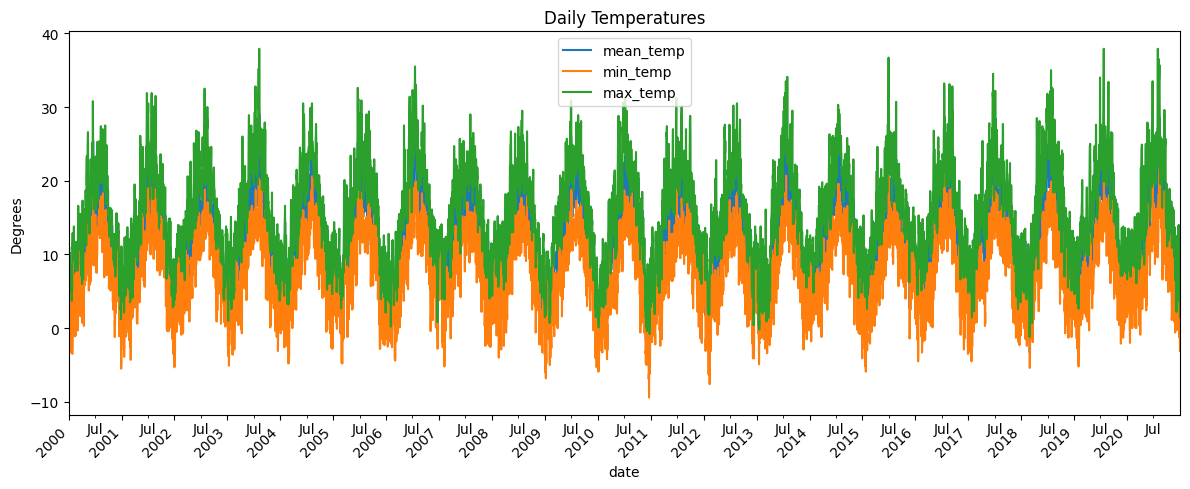

In [ ]:
#The data
temp_cols = ['mean_temp','min_temp','max_temp']
df_to_plot = df_new[temp_cols]
#The plot
ax=df_to_plot.plot(figsize=(12,5))
ax.set(title='Daily Temperatures', ylabel='Degrees')

# customize major ticks
major_loc =  mdates.YearLocator(1)
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)


# customize minor ticks
minor_loc =  mdates.MonthLocator(interval=6)
minor_fmt = mdates.DateFormatter("%b")

ax.xaxis.set_minor_locator(minor_loc)
ax.xaxis.set_minor_formatter(minor_fmt)

## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate(which='major',rotation=45)

# Adjust layout
plt.tight_layout()

plt.show()


## Plotting Precipitation & snow_depth

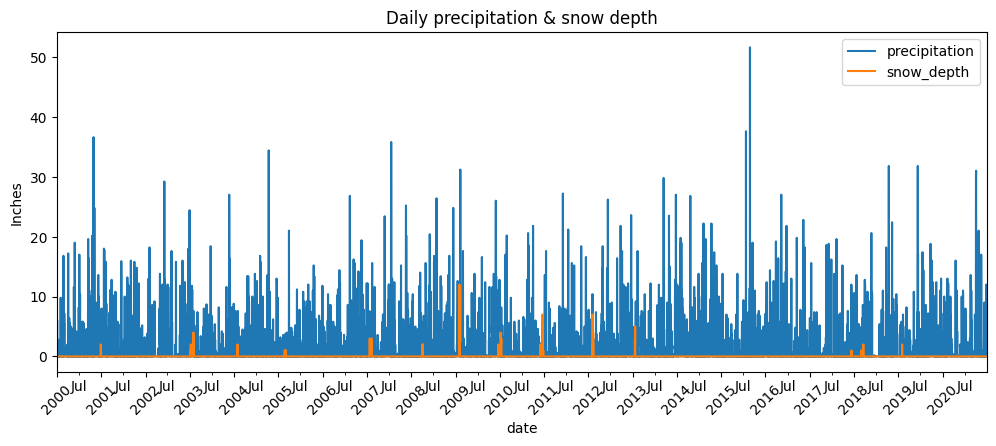

In [ ]:
precip_cols = ['precipitation','snow_depth']
df_to_plotPrecip  = df_new[precip_cols]
ax=df_to_plotPrecip.plot(figsize=(12,5))
ax.set(title='Daily precipitation & snow depth', ylabel='Inches')
# customize major ticks
major_loc =  mdates.YearLocator(1)
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)


# customize minor ticks
minor_loc =  mdates.MonthLocator(interval=6)
minor_fmt = mdates.DateFormatter("%b")

ax.xaxis.set_minor_locator(minor_loc)
ax.xaxis.set_minor_formatter(minor_fmt)

## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate(which='major',rotation=45, ha='center');

## Q1: What month had the most precipitation between 2000 through 2010?


   ### Resample the precipitation column to a Monthly frequency using .sum() as the aggregation method



In [ ]:
# creating the precipitation dataframe
precip = df.loc['2000':'2010', ['precipitation']].copy()
precip.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2010-12-22', '2010-12-23', '2010-12-24', '2010-12-25',
               '2010-12-26', '2010-12-27', '2010-12-28', '2010-12-29',
               '2010-12-30', '2010-12-31'],
              dtype='datetime64[ns]', name='date', length=4018, freq=None)

In [ ]:
#Resample the precipitation column to a Monthly frequency using .sum() as the aggregation method
precip_MS_res = precip.resample("MS").sum()
precip_MS_res.name = 'Resampled'
precip_MS_res.head()

,precipitation
date,
2000-01-01,14.3
2000-02-01,62.2
2000-03-01,13.4
2000-04-01,71.8
2000-05-01,68.4


### Find the date and corresponding value for the max precipitation.

In [ ]:
#Find the date and corresponding value for the max precipitation.
max_precip_date = precip_MS_res['precipitation'].idxmax()
max_precipitation_value = precip_MS_res.loc[max_precip_date, 'precipitation']

print("MaxDate:", max_precip_date)
print("Max_Value:", max_precipitation_value)

MaxDate: 2009-11-01 00:00:00
Max_Value: 138.4


- November 2009 had the most precipitation between the years 2000 through 2010.

### The Plot of the precipitation between the year:2000-2010
   

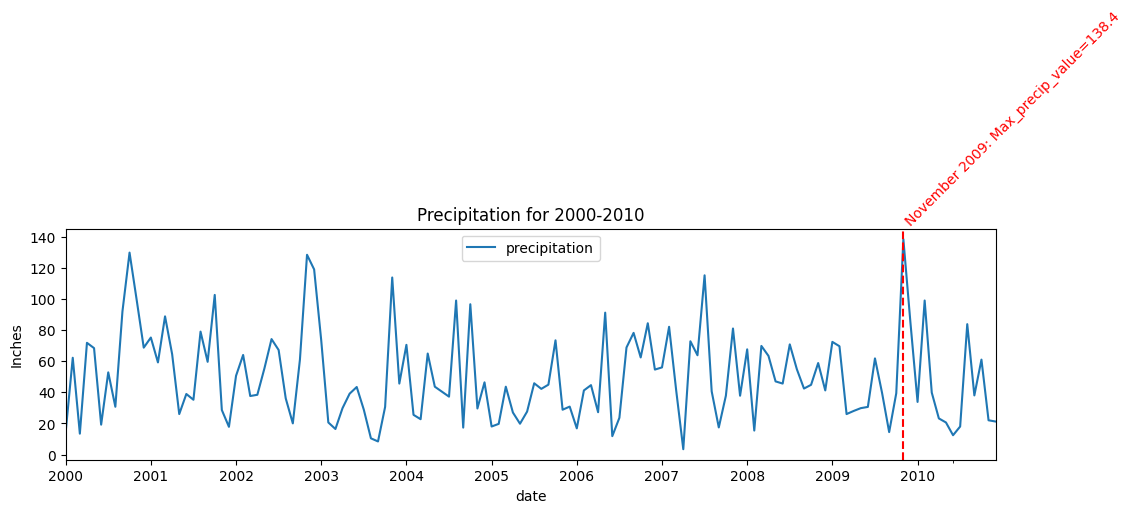

In [ ]:

#The plot
fig,ax = plt.subplots(figsize=(12,3))
precip_MS_res.plot(ax=ax)

ax.set(title='Precipitation for 2000-2010',
      ylabel='Inches')

# customize major ticks
major_loc =  mdates.YearLocator(1)
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)


# customize minor ticks
minor_loc =  mdates.MonthLocator(interval=3)

ax.xaxis.set_minor_locator(minor_loc)

plt.axvline(x=max_precip_date, color='red', linestyle='--')
# Customize the max precipitation vertical Line

plt.text(max_precip_date, plt.gca().get_ylim()[1], 'November 2009: Max_precip_value=138.4', color='red', rotation=45, verticalalignment='bottom')

## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate(which='major',rotation=90)

plt.legend()
plt.show()

## Q2: Which year between 2000-2020 had the coolest average temperature?

In [ ]:
# creating the mean_temp dataframe
meantemp = df.loc['2000':'2020', ['mean_temp']].copy()
meantemp.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=7671, freq=None)

In [ ]:
#Resample the  mean_temp data to a Yearly frequency using .mean() as the aggregation method.
meantemp_Yearly_res = meantemp.resample("Y").mean()
meantemp_Yearly_res.name = 'Resampled'
meantemp_Yearly_res.head()

,mean_temp
date,
2000-12-31,11.575683
2001-12-31,11.331507
2002-12-31,12.084247
2003-12-31,12.114521
2004-12-31,11.900683


In [ ]:
#Find the date and corresponding value for the lowest mean temp.
min_meantemp_date = meantemp_Yearly_res['mean_temp'].idxmin()
min_meantemp_value = meantemp_Yearly_res.loc[min_meantemp_date, 'mean_temp']

print("MinDate:", min_meantemp_date)
print("coolest temp Value:", min_meantemp_value)

MinDate: 2010-12-31 00:00:00
coolest temp Value: 10.657397260273973


- 2010 had the lowest mean temp.

### The Plot of the mean_temp between the year:2000-2020
   

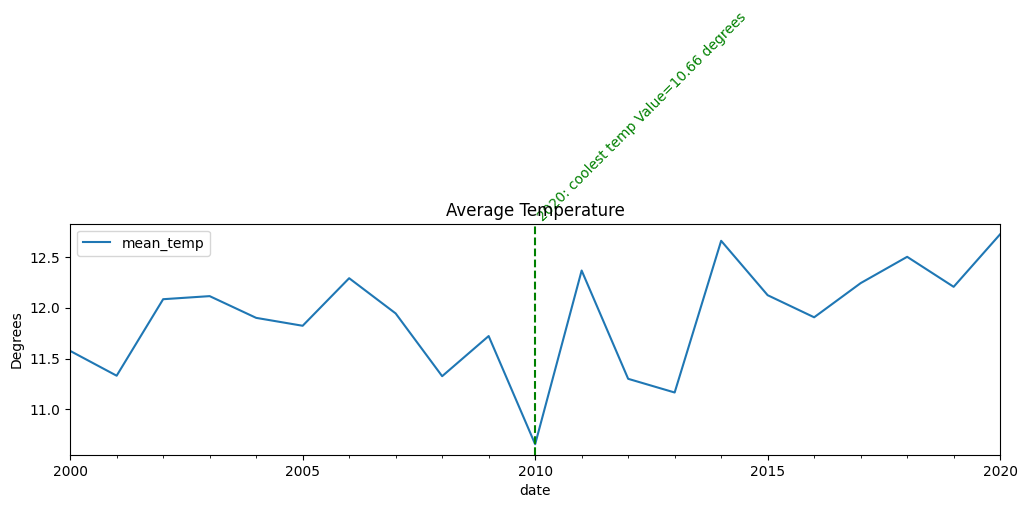

In [ ]:
#Add a vertical line at this date with a label that says the date (using date format: "2000") and the lowest mean temperature value.

#The plot
fig,ax = plt.subplots(figsize=(12,3))
meantemp_Yearly_res.plot(ax=ax)

ax.set(title='Average Temperature',
      ylabel='Degrees')

# customize major ticks
major_loc =  mdates.YearLocator(5)
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)


# customize minor ticks
minor_loc =  mdates.YearLocator(1)

ax.xaxis.set_minor_locator(minor_loc)

plt.axvline(x=min_meantemp_date, color='green', linestyle='--')
# Customize the min mean_temp vertical Line

plt.text(min_meantemp_date, plt.gca().get_ylim()[1], '2020: coolest temp Value=10.66 degrees', color='green', rotation=45, verticalalignment='bottom')

## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate(which='major',rotation=90)

plt.legend()
plt.show()